## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  43.912316   654.644852  0.152563  5.671554  1.129510
1  23.563664   384.921940  0.747509  7.437921  1.337324
2  99.396589  1157.727677  0.233682  7.416690  1.185602
3  16.396190   585.664999  0.005443  9.780957  0.163186
4  24.892742  1088.473200  0.792991  3.762146  1.475147


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9716199	total: 56.3ms	remaining: 56.3s
1:	learn: 0.9634629	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9534727	total: 57.6ms	remaining: 19.2s
3:	learn: 0.9448324	total: 58.3ms	remaining: 14.5s
4:	learn: 0.9329804	total: 59ms	remaining: 11.7s
5:	learn: 0.9245948	total: 59.5ms	remaining: 9.85s
6:	learn: 0.9121587	total: 60ms	remaining: 8.52s
7:	learn: 0.8985040	total: 60.6ms	remaining: 7.52s
8:	learn: 0.8883025	total: 61.2ms	remaining: 6.73s
9:	learn: 0.8784472	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8688821	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8574588	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8485779	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8401206	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8303114	total: 65.7ms	remaining: 4.31s
15:	learn: 0.8226203	total: 66.7ms	remaining: 4.1s
16:	learn: 0.8103354	total: 67.5ms	remaining: 3.9s
17:	learn: 0.8015981	total: 68.4ms	remaining: 3.73s
18:	learn: 0.7930716	total: 69.1ms	remaining: 3.57s

138:	learn: 0.2593937	total: 152ms	remaining: 942ms
139:	learn: 0.2574403	total: 153ms	remaining: 942ms
140:	learn: 0.2555815	total: 154ms	remaining: 939ms
141:	learn: 0.2538378	total: 155ms	remaining: 936ms
142:	learn: 0.2519343	total: 155ms	remaining: 931ms
143:	learn: 0.2500336	total: 156ms	remaining: 927ms
144:	learn: 0.2482503	total: 157ms	remaining: 923ms
145:	learn: 0.2467281	total: 157ms	remaining: 919ms
146:	learn: 0.2448195	total: 158ms	remaining: 916ms
147:	learn: 0.2430274	total: 158ms	remaining: 912ms
148:	learn: 0.2413174	total: 159ms	remaining: 908ms
149:	learn: 0.2394500	total: 160ms	remaining: 906ms
150:	learn: 0.2381826	total: 160ms	remaining: 901ms
151:	learn: 0.2358936	total: 161ms	remaining: 897ms
152:	learn: 0.2343319	total: 161ms	remaining: 892ms
153:	learn: 0.2329495	total: 162ms	remaining: 889ms
154:	learn: 0.2314680	total: 163ms	remaining: 886ms
155:	learn: 0.2297845	total: 163ms	remaining: 883ms
156:	learn: 0.2284014	total: 164ms	remaining: 879ms
157:	learn: 

329:	learn: 0.0921422	total: 302ms	remaining: 613ms
330:	learn: 0.0915212	total: 302ms	remaining: 611ms
331:	learn: 0.0912948	total: 303ms	remaining: 611ms
332:	learn: 0.0908979	total: 304ms	remaining: 609ms
333:	learn: 0.0905176	total: 305ms	remaining: 608ms
334:	learn: 0.0901299	total: 306ms	remaining: 607ms
335:	learn: 0.0898561	total: 306ms	remaining: 605ms
336:	learn: 0.0894780	total: 307ms	remaining: 604ms
337:	learn: 0.0891080	total: 307ms	remaining: 602ms
338:	learn: 0.0887459	total: 308ms	remaining: 600ms
339:	learn: 0.0885093	total: 308ms	remaining: 599ms
340:	learn: 0.0881564	total: 309ms	remaining: 597ms
341:	learn: 0.0879381	total: 310ms	remaining: 596ms
342:	learn: 0.0876317	total: 310ms	remaining: 594ms
343:	learn: 0.0873422	total: 311ms	remaining: 593ms
344:	learn: 0.0871310	total: 311ms	remaining: 591ms
345:	learn: 0.0867892	total: 312ms	remaining: 590ms
346:	learn: 0.0864547	total: 313ms	remaining: 588ms
347:	learn: 0.0860454	total: 314ms	remaining: 588ms
348:	learn: 

539:	learn: 0.0467525	total: 460ms	remaining: 392ms
540:	learn: 0.0466451	total: 461ms	remaining: 392ms
541:	learn: 0.0464893	total: 462ms	remaining: 391ms
542:	learn: 0.0463839	total: 463ms	remaining: 390ms
543:	learn: 0.0462451	total: 464ms	remaining: 389ms
544:	learn: 0.0461415	total: 464ms	remaining: 388ms
545:	learn: 0.0460399	total: 465ms	remaining: 387ms
546:	learn: 0.0458874	total: 466ms	remaining: 386ms
547:	learn: 0.0457460	total: 466ms	remaining: 385ms
548:	learn: 0.0456253	total: 467ms	remaining: 383ms
549:	learn: 0.0455517	total: 468ms	remaining: 383ms
550:	learn: 0.0454080	total: 468ms	remaining: 382ms
551:	learn: 0.0453095	total: 469ms	remaining: 381ms
552:	learn: 0.0451708	total: 470ms	remaining: 380ms
553:	learn: 0.0450328	total: 470ms	remaining: 379ms
554:	learn: 0.0449581	total: 471ms	remaining: 378ms
555:	learn: 0.0448846	total: 473ms	remaining: 378ms
556:	learn: 0.0447227	total: 476ms	remaining: 378ms
557:	learn: 0.0446505	total: 477ms	remaining: 378ms
558:	learn: 

693:	learn: 0.0295322	total: 602ms	remaining: 265ms
694:	learn: 0.0294944	total: 604ms	remaining: 265ms
695:	learn: 0.0294002	total: 604ms	remaining: 264ms
696:	learn: 0.0293392	total: 605ms	remaining: 263ms
697:	learn: 0.0292715	total: 606ms	remaining: 262ms
698:	learn: 0.0292342	total: 606ms	remaining: 261ms
699:	learn: 0.0291411	total: 607ms	remaining: 260ms
700:	learn: 0.0290665	total: 608ms	remaining: 259ms
701:	learn: 0.0289773	total: 608ms	remaining: 258ms
702:	learn: 0.0289128	total: 609ms	remaining: 257ms
703:	learn: 0.0288762	total: 610ms	remaining: 256ms
704:	learn: 0.0287900	total: 610ms	remaining: 255ms
705:	learn: 0.0286990	total: 611ms	remaining: 254ms
706:	learn: 0.0286366	total: 612ms	remaining: 253ms
707:	learn: 0.0285659	total: 612ms	remaining: 252ms
708:	learn: 0.0285010	total: 613ms	remaining: 252ms
709:	learn: 0.0284650	total: 614ms	remaining: 251ms
710:	learn: 0.0283771	total: 615ms	remaining: 250ms
711:	learn: 0.0283286	total: 616ms	remaining: 249ms
712:	learn: 

849:	learn: 0.0191417	total: 763ms	remaining: 135ms
850:	learn: 0.0190491	total: 765ms	remaining: 134ms
851:	learn: 0.0190050	total: 766ms	remaining: 133ms
852:	learn: 0.0189606	total: 767ms	remaining: 132ms
853:	learn: 0.0188945	total: 768ms	remaining: 131ms
854:	learn: 0.0188686	total: 768ms	remaining: 130ms
855:	learn: 0.0188431	total: 769ms	remaining: 129ms
856:	learn: 0.0188001	total: 769ms	remaining: 128ms
857:	learn: 0.0187333	total: 770ms	remaining: 127ms
858:	learn: 0.0186869	total: 771ms	remaining: 127ms
859:	learn: 0.0186452	total: 772ms	remaining: 126ms
860:	learn: 0.0185631	total: 772ms	remaining: 125ms
861:	learn: 0.0185389	total: 773ms	remaining: 124ms
862:	learn: 0.0185153	total: 773ms	remaining: 123ms
863:	learn: 0.0184905	total: 774ms	remaining: 122ms
864:	learn: 0.0184464	total: 775ms	remaining: 121ms
865:	learn: 0.0184153	total: 776ms	remaining: 120ms
866:	learn: 0.0183897	total: 777ms	remaining: 119ms
867:	learn: 0.0183397	total: 778ms	remaining: 118ms
868:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.35359261716020185


ABC Pre-generator MAE 1.1491654181315667


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

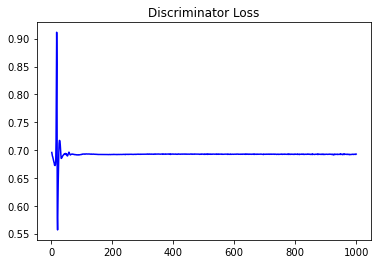

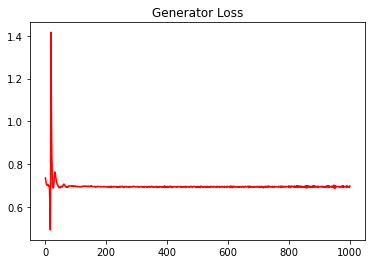

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3258332640035078


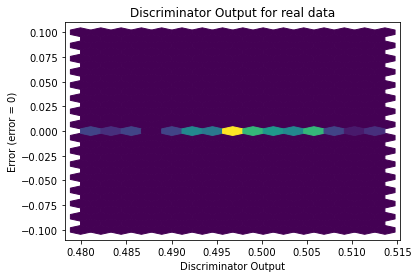

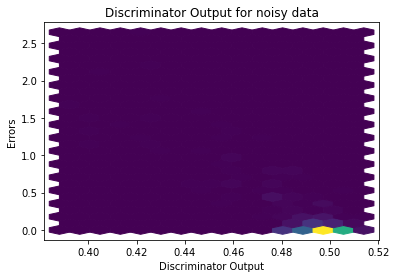

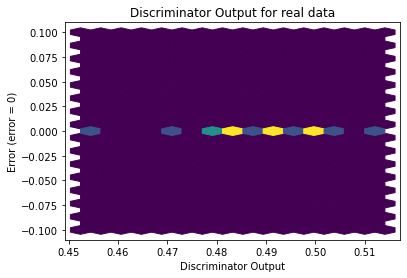

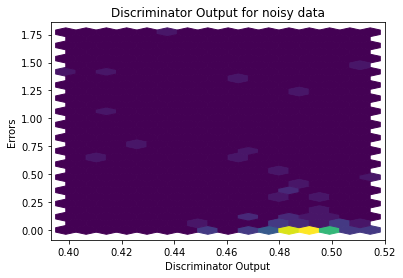

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

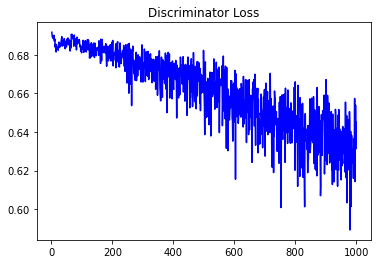

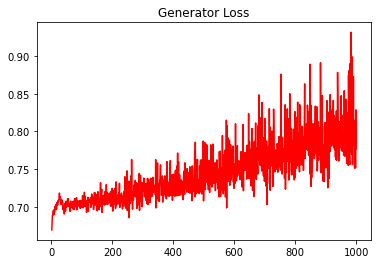

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.28832612020056697


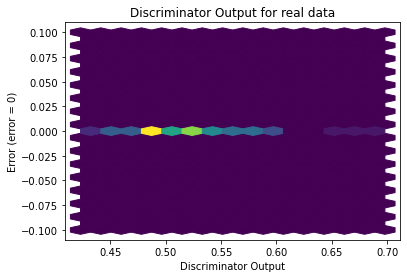

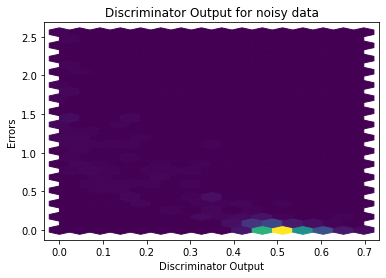

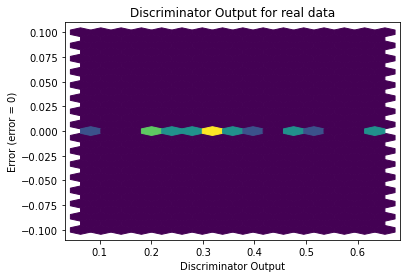

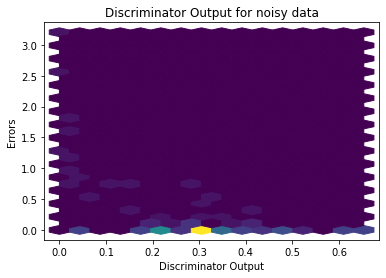

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


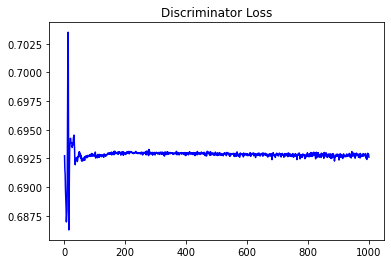

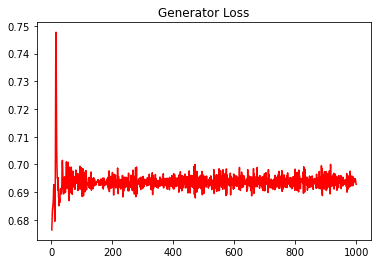

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.30418242667615414


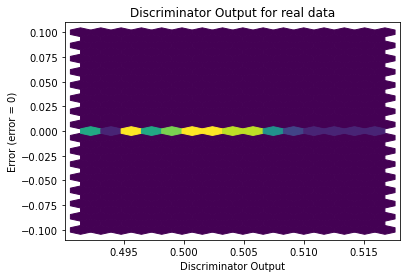

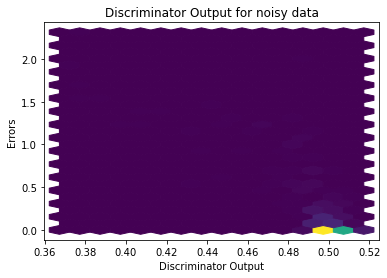

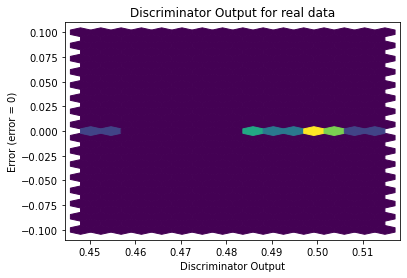

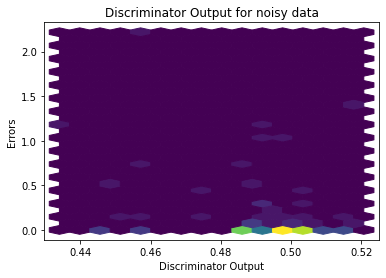

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


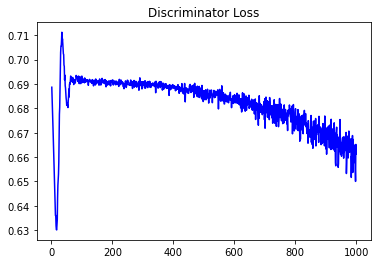

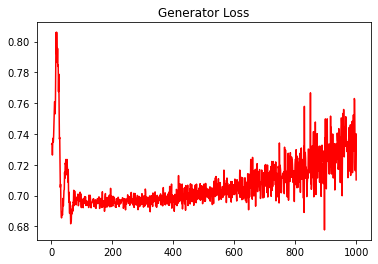

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3478991974964738


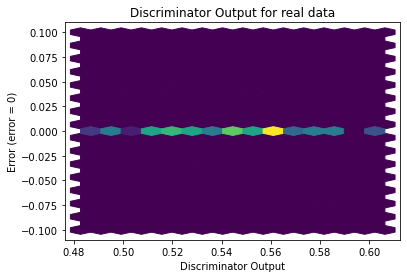

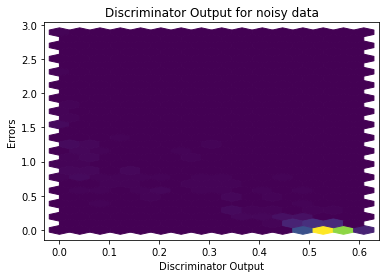

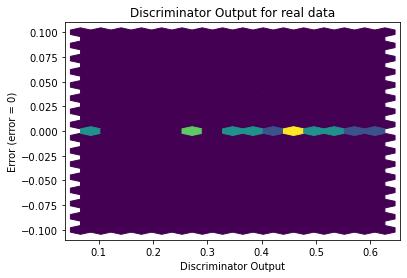

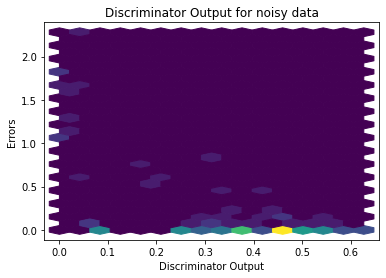

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6909]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1361]], requires_grad=True)
